In [ ]:
import lazyslide as zs

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [ ]:
wsi = zs.datasets.lung_carcinoma(with_data=False)

WSI: /home/runner/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/7f3d6cdc6a2dab43ff6ca2b3963f1353db133c30/lung_carcinoma.ndpi
Reader: openslide
Dimensions: 15616×16384 (h×w), 8 Pyramids
Pixel physical size: 0.22731405710129116 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1817, 1906)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
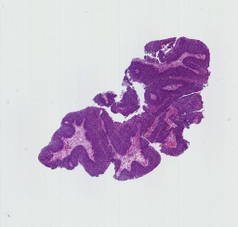

In [ ]:
wsi

In [ ]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 512, overlap=0.2, background_fraction=0.95, mpp=0.5)

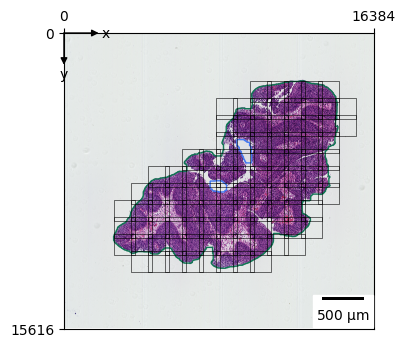

In [ ]:
zs.pl.tiles(wsi, linewidth=0.4)

In [ ]:
zs.seg.cells(wsi, batch_size=32)

instanseg/instanseg_v0_1_0.pt:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

Output()

/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/torch/nn/modules/modul
e.py:1762: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse 
tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally
at /pytorch/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  return forward_call(*args, **kwargs)

In [ ]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cells", linewidth=1, fill=False)
v.add_zoom(5500, 6500, 7500, 8500)
v.show()

In [ ]:
zs.seg.cell_types(wsi, batch_size=32)

Processing tiles ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 05:06

In [ ]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cell_types", color_by="class")

<Axes: >

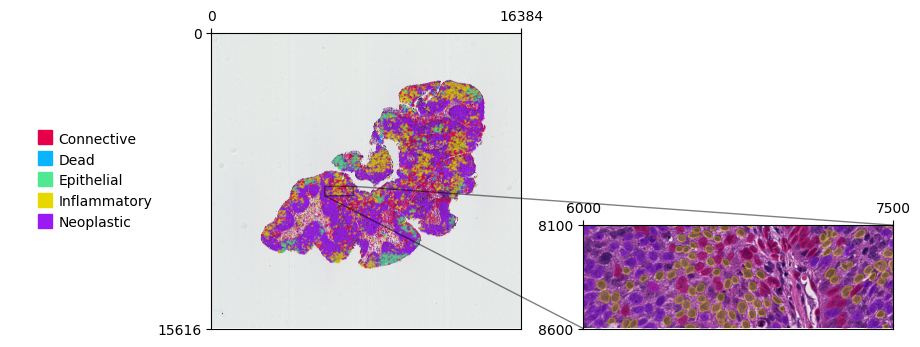

In [ ]:
v.add_zoom(6000, 7500, 8100, 8600, cache=False)
v.show()